C:\Users\aniru\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2010-01-04  56.020000  56.900002  56.009998  56.759998   5721600  12.381611   
2010-01-05  56.700001  57.000000  56.389999  56.980000   4090800  12.429602   
2010-01-06  56.580002  56.580002  55.759998  56.110001   5910800  12.239821   
2010-01-07  55.080002  55.169998  54.220001  54.400002  10187200  11.866802   
2010-01-08  53.770000  54.849998  53.549999  54.540001   5775600  11.897342   

            Average Price  Turnover in lacs  Earning per share  \
Date                                                             
2010-01-04      56.455000       3230.129280                 47   
2010-01-05      56.694999       2319.279040                 47   
2010-01-06      56.170000       3320.096360                 47   
2010-01-07      54.695000       5571.888989                 47   
2010-01-08      54.199998       3130.375113       

C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: pd.rol

<IPython.core.display.Javascript object>


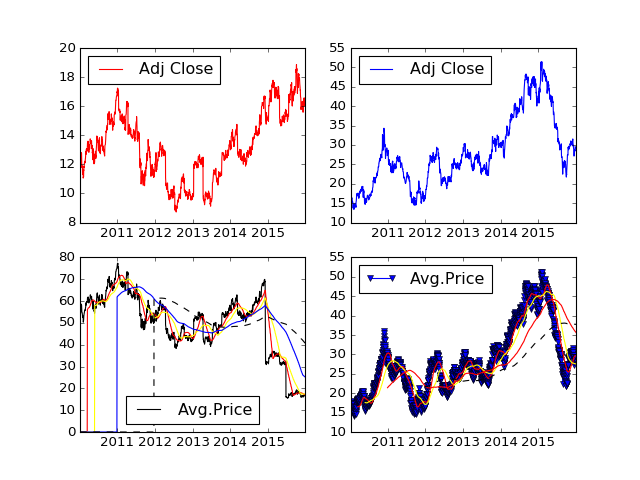

In [1]:
import numpy as np
import pandas as pd
from pandas.io.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
get_ipython().magic("matplotlib notebook")
import math
from math import log
from matplotlib.dates import date2num


Change_infy = []
Change_ttm = []
## Infosys
infy = DataReader('INFY', 'yahoo',datetime(2010,1,1), datetime(2016,1,1))
infy['Average Price'] = infy[['High','Low']].mean(axis=1) ## axis = 1, to compute mean over two columns
infy['Turnover in lacs'] = infy['Volume'] * infy['Average Price']/10**5
infy['Earning per share'] = 47 ## Provided in the Annual report of the company.
infy['Price to Earning Ratio'] = infy['Average Price']/infy['Earning per share']
infy['%change'] = infy.High.pct_change()*100
infy['_10MA'] = pd.rolling_mean(infy['Close'] , 10)
infy['_50MA'] = pd.rolling_mean(infy['Close'] , 50)
infy['_100MA'] = pd.rolling_mean(infy['Close'] , 100)
infy['_250MA'] = pd.rolling_mean(infy['Close'] , 250)
infy['_500MA'] = pd.rolling_mean(infy['Close'] , 500)

infy = infy.fillna(0)
print (infy.head())

## Tata Motors
ttm = DataReader('TTM','yahoo',datetime(2010,1,1), datetime(2016,1,1))
ttm['Average Price'] = ttm[['High','Low']].mean(axis=1)
ttm['Turnover in lacs'] = ttm['Volume'] * ttm['Average Price']/10**5
ttm['Earning per share'] = 94.32
ttm['Price to Earning Ratio'] = ttm['Average Price']/ttm['Earning per share']
ttm['%change'] = ttm.High.pct_change()*100
ttm['_10MA'] = pd.rolling_mean(ttm['Close'] , 10)
ttm['_50MA'] = pd.rolling_mean(ttm['Close'] , 50)
ttm['_100MA'] = pd.rolling_mean(ttm['Close'] , 100)
ttm['_250MA'] = pd.rolling_mean(ttm['Close'] , 250)
ttm['_500MA'] = pd.rolling_mean(ttm['Close'] , 500)
ttm['Log_AdjClose'] = np.log(ttm['Adj Close'])
ttm['Change'] = ttm['Log_AdjClose'] - ttm['Log_AdjClose'].shift()
print (ttm.head())


fig = plt.figure()
xa1 = plt.subplot(2,2,1)
xa2 = plt.subplot(2,2,2, sharex = xa1)
xa1.plot(infy['Adj Close'], '-k' ,color = 'red')
xa1.legend(loc='best')
xa2.plot(ttm['Adj Close'] , 'r', color = 'blue')
xa2.legend(loc='best')

ya1 = fig.add_subplot(2,2,3)
ya2 = fig.add_subplot(2,2,4)
ya1.plot(infy['Average Price'] , 'k', label = 'Avg.Price')
ya1.plot(infy['_50MA'] , 'r' , label = '_50MA')
ya1.plot(infy['_100MA'] , color = 'yellow' , label = '_100MA')
ya1.plot(infy['_250MA'] , color = 'blue' , label = '_250MA')
ya1.plot(infy['_500MA'] , '--k' , label = '_500MA')
ya1.legend(loc='best')
plt.show()
ya2.plot(ttm['Average Price'] , '-v' , label = 'Avg.Price')
ya2.plot(ttm['_50MA'] , 'r' , label ='_50MA')
ya2.plot(ttm['_100MA'] , color = 'yellow' , label = '_100MA')
ya2.plot(ttm['_250MA'] , color = 'red' , label = '_250MA')
ya2.plot(ttm['_500MA'] , '--k' , label = '_500MA')
ya2.legend(loc='best')
#plt.show()

<IPython.core.display.Javascript object>


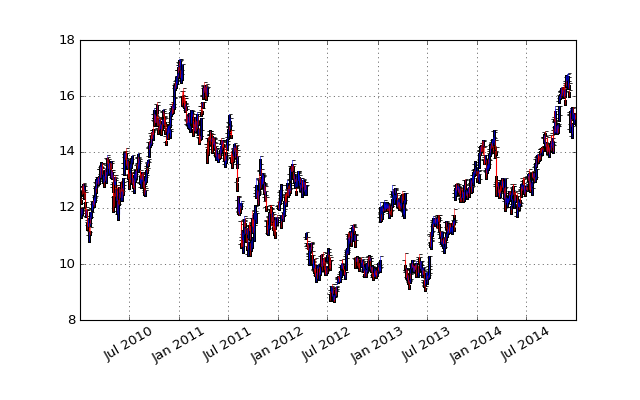

<IPython.core.display.Javascript object>


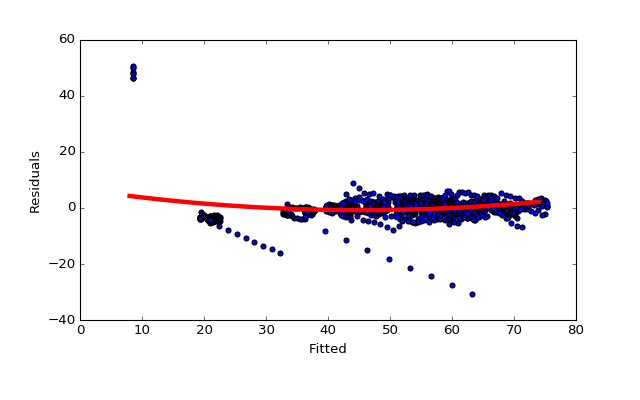

In [17]:
##plotting candlestick for open high low and close


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import pandas as pd

start = (2010 , 1, 1)
end = (2015,1,1)
quotes = mpf.quotes_historical_yahoo_ohlc('INFY',start, end)
quotes[:2]

fig, ax = plt.subplots(figsize = (8, 5))
fig.subplots_adjust(bottom = 0.2)
mpf.plot_day_summary_oclh(ax, quotes, ticksize = 3, colorup = 'k', colordown= 'r')
mpf.candlestick_ohlc(ax, quotes, width = 0.8, colorup = 'b', colordown = 'r')

plt.grid(True)
ax.xaxis_date()
ax.autoscale_view()


plt.setp(plt.gca().get_xticklabels(), rotation = 30)
quotes

plt.show()



start = (2010 , 1, 1)
end = (2015,1,1)
quotes1 = mpf.quotes_historical_yahoo_ohlc('TTM',start, end)
quotes1[:2]

fig, ax = plt.subplots(figsize = (8, 5))
fig.subplots_adjust(bottom = 0.2)
mpf.plot_day_summary_oclh(ax, quotes1, ticksize = 3, colorup = 'k', colordown= 'r')
mpf.candlestick_ohlc(ax, quotes1, width = 0.8, colorup = 'b', colordown = 'r')

plt.grid(True)
ax.xaxis_date()
ax.autoscale_view()


plt.setp(plt.gca().get_xticklabels(), rotation = 30)

plt.show()


<IPython.core.display.Javascript object>


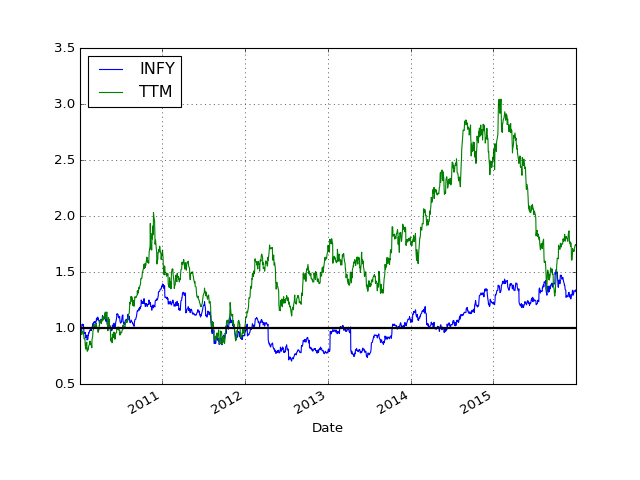

In [2]:
## To see how profitable each stock was since the beginning of the period.
## Another benefit of this chart is that, herer we can see that each stock is
## corelated, i.e they move in the same direction.


stocks = pd.DataFrame({"INFY": infy["Adj Close"],
                      "TTM": ttm["Adj Close"]})
stock_return = stocks.apply(lambda x:x/x[0])

stock_return.plot(grid =True).axhline(y = 1, color = 'black', lw = 2 )

<IPython.core.display.Javascript object>


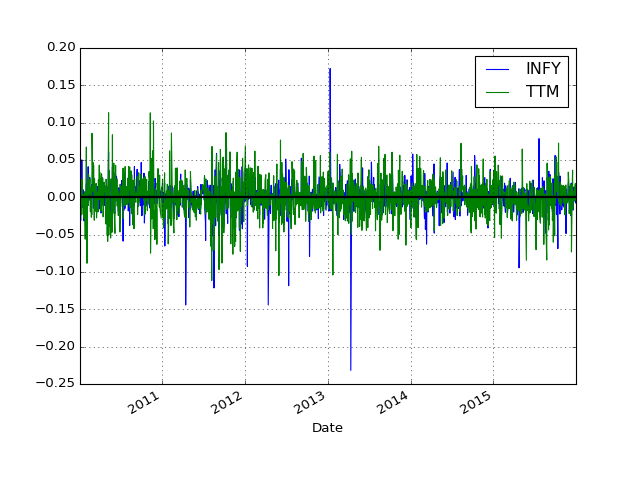

In [3]:
## We can monitor the growth of stock
stock_change=stocks.apply(lambda x:np.log(x) - np.log(x.shift(1)))
stock_change.plot(grid = True).axhline(y = 0,color = 'black', lw=2)

# In depth analysis of Infosys

C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).mean()


<IPython.core.display.Javascript object>


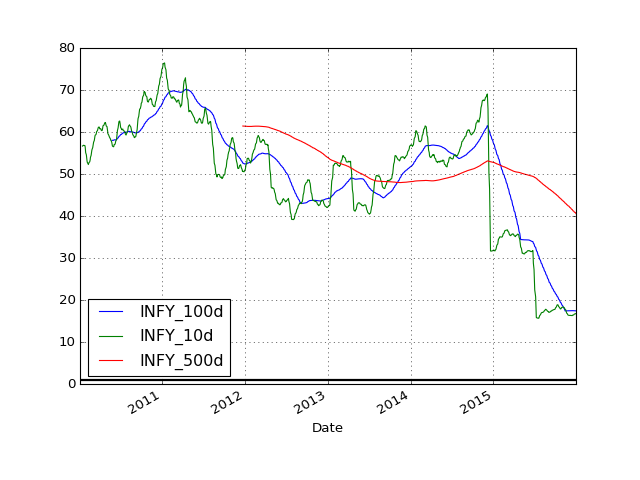

In [4]:
## MA average smooth a series and help identify trends.
## 10 day MA is most sensitive to changes unlike 100 and 500 days.
## For infy the 500 day shows a more bearish trend. As seen the stock is 
## trending downward with time
infy['10d'] = pd.rolling_mean(infy['Close'] , 10)
infy['100d'] = pd.rolling_mean(infy['Close'] , 100)
infy['500d'] = pd.rolling_mean(infy['Close'] , 500)
moving_average_infy = pd.DataFrame({"INFY_10d": infy['10d'],
                      "INFY_100d":infy['100d'],
                       "INFY_500d":infy['500d']})           
                                 
moving_average_infy.plot(grid =True).axhline(y = 1, color = 'black', lw = 2 )
## from this graph we can decipher that when for a given company if the 
## moving average line crosses each other then it depicts a change in trend.
## These crossing can be taken as a trading signals or indications of 
##  financial security changing and a profitable trade might be made.

In [5]:
## in our case 10d is a fast moving average(FMA) and 100d is a slow moving average(SMA).
## Thumb rule is - trade when the FMA crosses the SMA 
##               - Exit trade when the FMA crosses over the SMA again!!!!

 
import matplotlib.pyplot as plt
infy['10d-100d'] = infy['10d'] - infy['100d']
## we take the diff of both FMA and SMA and name is obs_regime.
## if FMA is above the SMA then it is a bullish regime
## where as FMA is below the SMA then it is a bearish regime

infy['obs_regime'] = np.where(infy['10d-100d'] >= 0,1,0) ## .where() is a vectorised if else function.
infy['obs_regime'] = np.where(infy['10d-100d'] < 0,-1, infy['obs_regime'])

## we are considering 1 for bullish regime and -1 for bearinsh regime above.
infy['obs_regime'].value_counts()

## from the output, things we can decipher is that for 794 days, 
## the market was bearish for infosys where as it was bullish for 617 days. 
## And it was neutral for about 99 days.




-1    794
 1    617
 0     99
Name: obs_regime, dtype: int64

In [6]:
## Trading signal appears when regime changes. It is classified as bullish when
## buy signal is triggered and it is bearish when sell signal is triggered 
## formula for signal is S(t) = sign(regime(t)-regime(t-1))
regime_orig_infy = infy.ix[-1,'obs_regime']
infy.ix[-1,'obs_regime'] = 0
infy['Signal'] = np.sign(infy['obs_regime']-infy['obs_regime'].shift(1))
infy.ix[-1,'obs_regime']= regime_orig_infy
infy.tail()
## When signal is -1 it indicates sell. 1 indicates buying and 0 indicates no action

,Open,High,Low,Close,Volume,Adj Close,Average Price,Turnover in lacs,Earning per share,Price to Earning Ratio,...,_50MA,_100MA,_250MA,_500MA,10d,100d,500d,10d-100d,obs_regime,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-24,16.860001,16.920000,16.799999,16.850000,534200,16.495047,16.860000,90.066117,47,0.358723,...,17.1138,17.4459,25.32056,40.90640,16.650,17.4459,40.90640,-0.7959,-1.0,0.0
2015-12-28,16.850000,16.990000,16.750000,16.840000,1648700,16.485258,16.870000,278.135690,47,0.358936,...,17.1016,17.4404,25.26204,40.82902,16.711,17.4404,40.82902,-0.7294,-1.0,0.0
2015-12-29,16.910000,17.049999,16.900000,16.950001,1914800,16.592941,16.974999,325.037290,47,0.361170,...,17.0798,17.4368,25.20400,40.74862,16.754,17.4368,40.74862,-0.6828,-1.0,0.0
2015-12-30,16.790001,16.879999,16.750000,16.820000,1605000,16.465678,16.814999,269.880742,47,0.357766,...,17.0578,17.4297,25.14368,40.66964,16.757,17.4297,40.66964,-0.6727,-1.0,0.0
2015-12-31,16.940001,16.940001,16.719999,16.750000,1472700,16.397153,16.830000,247.855410,47,0.358085,...,17.0318,17.4203,25.08468,40.59096,16.740,17.4203,40.59096,-0.6803,-1.0,1.0


In [7]:
infy['Signal'].value_counts()
## In this data , we can decipher that any infosys stock would be bought 14 times
## and will be sold 14 times in this span of 5 years.

 0.0    1481
-1.0      14
 1.0      14
Name: Signal, dtype: int64

In [8]:
## Here we compute as to when to buy and when to sell
infy_signals = pd.concat([
        pd.DataFrame({"Price": infy.loc[infy["Signal"] == 1, "Close"],
                     "Regime": infy.loc[infy["Signal"] == 1, "obs_regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": infy.loc[infy["Signal"] == -1, "Close"],
                     "Regime": infy.loc[infy["Signal"] == -1, "obs_regime"],
                     "Signal": "Sell"}),
    ])
infy_signals.sort_index(inplace = True)
infy_signals


,Price,Regime,Signal
Date,,,
2010-05-26,55.590000,-1.0,Sell
2010-06-14,61.099998,1.0,Buy
2010-07-21,58.009998,-1.0,Sell
2010-08-02,61.340000,1.0,Buy
2010-08-23,59.369999,-1.0,Sell
2010-09-10,62.330002,1.0,Buy
2011-02-02,68.019997,-1.0,Sell
2011-04-04,73.389999,1.0,Buy
2011-04-19,63.900002,-1.0,Sell


In [9]:
## To coumpute the profit or loss incurred
infy_profits = pd.DataFrame({
        "Profit": pd.Series(infy_signals["Price"] - infy_signals["Price"].shift(1)).loc[
            infy_signals.loc[(infy_signals["Signal"].shift(1) == "Buy") & (infy_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": infy_signals["Price"].loc[
            infy_signals.loc[(infy_signals["Signal"].shift(1) == "Buy") & (infy_signals["Regime"].shift(1) == 1)].index
        ].index
    })
infy_profits = infy_profits.set_index('End Date')
infy_profits

,Profit
End Date,
2010-07-21,-3.090000
2010-08-23,-1.970001
2011-02-02,5.689995
2011-04-19,-9.489997
2011-11-21,-9.889999
2012-01-26,-0.509998
2012-04-17,-6.750000
2012-10-31,-2.240002
2012-12-10,-0.380001


In [20]:
import sklearn
from datetime import datetime

from pandas.io.data import DataReader
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA
def create_lagged_series(lags=5):
    """This creates a pandas DataFrame that stores the percentage returns of the 
    adjusted closing value of a stock obtained from Yahoo Finance, along with 
    a number of lagged returns from the prior trading days (lags defaults to 5 days).
    Trading volume, as well as the Direction from the previous day, are also included."""

    # Obtain stock information from Yahoo Finance
    ts = DataReader('INFY', "yahoo", datetime(2010,1,1), datetime(2016,1,1))
    start_date = (2010,1,1)
    # Create the new lagged DataFrame
    tslag = pd.DataFrame(index=ts.index)
    tslag["Today"] = ts["Adj Close"]
    tslag["Volume"] = ts["Volume"]

    # Create the shifted lag series of prior trading period close values
    for i in xrange(0,lags):
        tslag["Lag%s" % str(i+1)] = ts["Adj Close"].shift(i+1)

    # Create the returns DataFrame
    tsret = pd.DataFrame(index=tslag.index)
    tsret["Volume"] = tslag["Volume"]
    tsret["Today"] = tslag["Today"].pct_change()*100.0

    # If any of the values of percentage returns equal zero, set them to
    # a small number (stops issues with QDA model in scikit-learn)
    for i,x in enumerate(tsret["Today"]):
        if (abs(x) < 0.0001):
            tsret["Today"][i] = 0.0001

    # Create the lagged percentage returns columns
    for i in xrange(0,lags):
        tsret["Lag%s" % str(i+1)] = tslag["Lag%s" % str(i+1)].pct_change()*100.0

    # Create the "Direction" column (+1 or -1) indicating an up/down day
    tsret["Direction"] = np.sign(tsret["Today"])
    tsret = tsret[tsret.index >= datetime(2010,1,1)]
    tsret = tsret.fillna(0)
    
    
    tsret = tsret.reset_index()
    tsret['Date'] = tsret['Date'].dt.year
    global tsret

    return tsret.head()
    

create_lagged_series()


<ipython-input-20-bfabc253581d>:49: SyntaxWarning: name 'tsret' is assigned to before global declaration
  global tsret
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Volume,Today,Lag1,Lag2,Lag3,Lag4,Lag5,Direction
0,2010,5721600,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,2010,4090800,0.387599,0.000000,0.000000,0.000000,0.0,0.0,1.0
2,2010,5910800,-1.526847,0.387599,0.000000,0.000000,0.0,0.0,-1.0
3,2010,10187200,-3.047585,-1.526847,0.387599,0.000000,0.0,0.0,-1.0
4,2010,5775600,0.257357,-3.047585,-1.526847,0.387599,0.0,0.0,1.0


   ## Multiple regression

In [30]:
##INFY

X = infy[["_10MA","_100MA","_250MA","_500MA"]]
X = sm.add_constant(X)
y = infy['High'].values
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     3163.
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        05:45:18   Log-Likelihood:                -4471.9
No. Observations:                1510   AIC:                             8954.
Df Residuals:                    1505   BIC:                             8980.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.5743      0.598     14.349      0.000         7.402     9.746
_10MA          0.8886      0.012     76.413      0.000         0.866     0.911
_100MA         0.0071      0.010      0.692      0.489        -0.013     0.027
_250MA        -0.0253      0.008     -3.292      0.001        -0.040    -0.010
_500MA        -0.0466      0.006     -7.560      0.000        -0.059    -0.034
==============================================================================
Omnibus:                     1798.420   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           308223.436
Skew:                           5.933   Prob(JB):                         0.00
Kurtosis:                      71.979   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = infy[["_10MA","_100MA","_250MA","_500MA"]].values
y = infy['High'].values
reg2 = LinearRegression()
reg2.fit(X, y)
(reg2.intercept_, reg2.coef_)

(8.5742937389006144,
 array([ 0.88858153,  0.0071258 , -0.02531729, -0.04656337]))

<IPython.core.display.Javascript object>


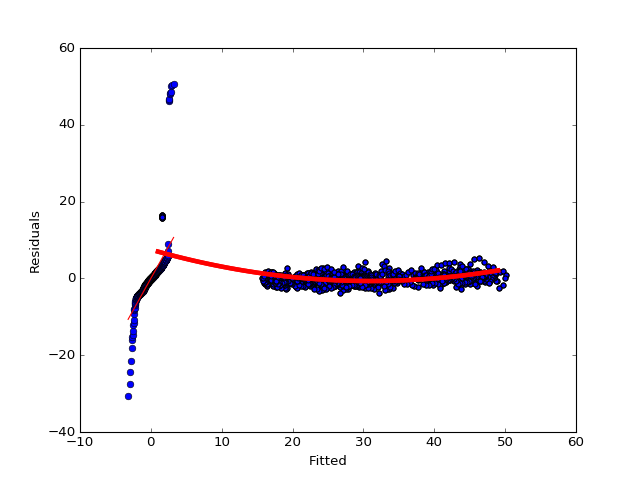

In [32]:
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(1,1,1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))    # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color='r', linewidth=4)    

def qq_plot(residuals):
    sm.qqplot(residuals)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd
    
fitted = reg2.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")


fig = sm.qqplot(residuals, dist="norm", line="r")

## Logistic Regression Infosys

In [44]:
X = tsret[tsret.columns[1:-1]]
y = pd.factorize(tsret["Direction"])[0]
clf = LogisticRegression()
clf.fit(X, y)
(clf.intercept_, clf.coef_)

(array([ -7.99853367e-13,   3.77343941e-15,  -3.83574255e-15]),
 array([[ -1.81769164e-06,  -3.62413110e-14,  -8.81696473e-14,
          -2.58289194e-13,  -1.38388953e-13,  -4.92303375e-14,
          -1.76360152e-13],
        [  6.11591006e-09,   8.51557480e-14,  -5.21113490e-15,
           9.30074312e-16,  -1.74176060e-16,   3.12434168e-15,
          -3.84246948e-15],
        [ -6.37038924e-09,  -8.51861729e-14,   5.21298381e-15,
          -9.30484494e-16,   1.72947091e-16,  -3.12599378e-15,
           3.84216364e-15]]))

In [22]:
probs = clf.predict_proba(X)
len(probs)
[prob[0] for prob in probs[20:30]]

[0.00011991088038583243,
 5.9681457039383608e-06,
 1.6600796287953792e-08,
 4.8023300165573475e-09,
 1.5961174401046209e-06,
 8.1057860190302673e-09,
 4.9509830076037841e-06,
 2.3447591470116612e-06,
 1.139911091241869e-06,
 2.2973818639966656e-05]

In [23]:
ypreds = ["Up" if prob[0] > 0.004555 else "Down" for prob in probs]
ypreds[10:30]

['Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down']

In [24]:
from __future__ import division
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
yacts = [str(x) for x in tsret["Direction"].values]
a = confusion_matrix(yacts, ypreds)
a

array([[  0,   0,   0, 645,  59],
       [  0,   0,   0,   1,   0],
       [  0,   0,   0, 752,  53],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]])

In [25]:
## Accuracy by above confusion matrix
(a[0][3]+a[2][4])/(a[0][3]+a[2][4]+a[0][4]+a[2][4])

0.86172839506172838

## Training and testing sets

In [26]:
infy_train_df = tsret[tsret["Date"] < 2012]
infy_test_df = tsret[tsret["Date"] >= 2012]
# train Logistic Regression model with training data
clf2 = LogisticRegression()
Xtrain = infy_train_df[tsret.columns[1:-2]]
ytrain = pd.factorize(infy_train_df["Direction"])[0]
clf2.fit(Xtrain, ytrain)
# test model with test data
Xtest = infy_test_df[tsret.columns[1:-2]]
ytest = pd.factorize(infy_test_df["Direction"])[0]
ypred = clf2.predict(Xtest)
# calculate confusion matrix and accuracy
confusion_matrix(ytest, ypred)

array([[  0, 532],
       [  0, 474]])

In [27]:
accuracy_score(ytest, ypred)

0.47117296222664018

## Fitting smaller model

In [28]:
clf3 = LogisticRegression()
Xtrain = infy_train_df[tsret.columns[1:3]]
Xtest = infy_test_df[tsret.columns[1:3]]
clf3.fit(Xtrain, ytrain)
ypred = clf3.predict(Xtest)
confusion_matrix(ytest, ypred)

array([[  0, 532],
       [  0, 474]])

In [29]:
accuracy_score(ytest, ypred)

0.47117296222664018

# In depth analysis of Tata Motors


C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  if __name__ == '__main__':
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  from ipykernel import kernelapp as app
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).mean()
  app.launch_new_instance()


<IPython.core.display.Javascript object>


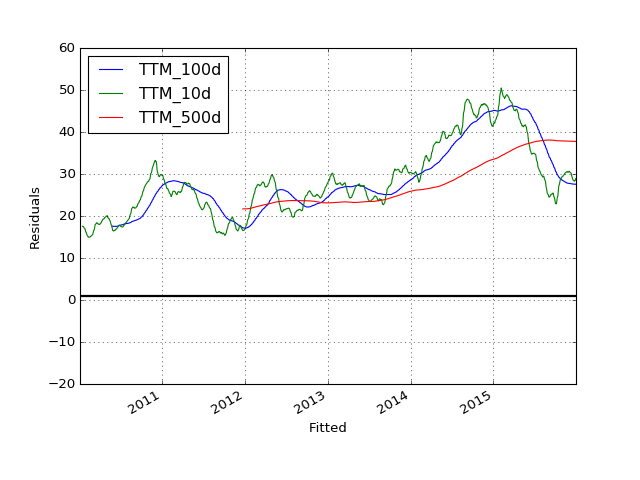

In [10]:
ttm['10d'] = pd.rolling_mean(ttm['Close'] , 10)
ttm['100d'] = pd.rolling_mean(ttm['Close'] , 100)
ttm['500d'] = pd.rolling_mean(ttm['Close'] , 500)
moving_average_ttm = pd.DataFrame({"TTM_10d": ttm['10d'],
                      "TTM_100d":ttm['100d'],
                       "TTM_500d":ttm['500d']})           
                                 
moving_average_ttm.plot(grid =True).axhline(y = 1, color = 'black', lw = 2 )
## For TTM the 500 day is bullish and is growing with time.

In [11]:
import matplotlib.pyplot as plt
ttm['10d-100d'] = ttm['10d'] - ttm['100d']
ttm['obs_regime'] = np.where(ttm['10d-100d'] >= 0,1,0)
ttm['obs_regime'] = np.where(ttm['10d-100d'] < 0,-1, ttm['obs_regime'])
## we are considering 1 for bullish regime and -1 for bearinsh regime above.
ttm['obs_regime'].value_counts()
## from the output, things we can decipher is that for 694 days, 
## the market was bearish for infosys where as it was bullish for 801 days. 
## And it was neutral for about 99 days.

 1    801
-1    610
 0     99
Name: obs_regime, dtype: int64

In [12]:
regime_orig_ttm = ttm.ix[-1,'obs_regime']
ttm.ix[-1,'obs_regime'] = 0
ttm['Signal'] = np.sign(ttm['obs_regime']-ttm['obs_regime'].shift(1))
ttm.ix[-1,'obs_regime']= regime_orig_ttm
ttm.tail()
## When signal is -1 it indicates sell. 1 indicates buying and 0 indicates no action

,Open,High,Low,Close,Volume,Adj Close,Average Price,Turnover in lacs,Earning per share,Price to Earning Ratio,...,_250MA,_500MA,Log_AdjClose,Change,10d,100d,500d,10d-100d,obs_regime,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-24,28.809999,29.139999,28.700001,28.930000,429300,28.917919,28.920000,124.153560,94.32,0.306616,...,35.87548,37.76456,3.364461,0.007982,28.291,27.5725,37.76456,0.7185,1.0,0.0
2015-12-28,29.510000,29.700001,29.100000,29.469999,1023300,29.457693,29.400001,300.850205,94.32,0.311705,...,35.82268,37.76436,3.382955,0.018494,28.523,27.5746,37.76436,0.9484,1.0,0.0
2015-12-29,29.389999,29.590000,29.250000,29.520000,1003800,29.507673,29.420000,295.317960,94.32,0.311917,...,35.77164,37.76370,3.384650,0.001695,28.754,27.5729,37.76370,1.1811,1.0,0.0
2015-12-30,29.480000,29.639999,29.270000,29.410000,762000,29.397719,29.454999,224.447096,94.32,0.312288,...,35.71392,37.76360,3.380917,-0.003733,28.909,27.5674,37.76360,1.3416,1.0,0.0
2015-12-31,29.360001,29.620001,29.270000,29.469999,569900,29.457693,29.445000,167.807058,94.32,0.312182,...,35.65952,37.76348,3.382955,0.002038,28.967,27.5590,37.76348,1.4080,1.0,-1.0


In [13]:
ttm['Signal'].value_counts()
## In this data , we can decipher that any infosys stock would be bought 14 times
## and will be sold 15 times in this span of 5 years.

 0.0    1480
-1.0      15
 1.0      14
Name: Signal, dtype: int64

In [14]:
ttm_signals = pd.concat([
        pd.DataFrame({"Price": ttm.loc[ttm["Signal"] == 1, "Close"],
                     "Regime": ttm.loc[ttm["Signal"] == 1, "obs_regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": ttm.loc[ttm["Signal"] == -1, "Close"],
                     "Regime": ttm.loc[ttm["Signal"] == -1, "obs_regime"],
                     "Signal": "Sell"}),
    ])
ttm_signals.sort_index(inplace = True)
ttm_signals

,Price,Regime,Signal
Date,,,
2010-05-26,15.680000,-1.0,Sell
2010-06-23,17.870001,1.0,Buy
2010-06-30,17.190001,-1.0,Sell
2010-07-22,18.840000,1.0,Buy
2011-01-18,26.490000,-1.0,Sell
2011-04-07,28.469999,1.0,Buy
2011-05-09,26.430000,-1.0,Sell
2011-10-28,21.340000,1.0,Buy
2011-11-16,17.610001,-1.0,Sell


In [15]:
ttm_profits = pd.DataFrame({
        "Profit": pd.Series(ttm_signals["Price"] - ttm_signals["Price"].shift(1)).loc[
            ttm_signals.loc[(ttm_signals["Signal"].shift(1) == "Buy") & (ttm_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": ttm_signals["Price"].loc[
            ttm_signals.loc[(ttm_signals["Signal"].shift(1) == "Buy") & (ttm_signals["Regime"].shift(1) == 1)].index
        ].index
    })
ttm_profits = ttm_profits.set_index('End Date')
ttm_profits

,Profit
End Date,
2010-06-30,-0.680000
2011-01-18,7.650000
2011-05-09,-2.039999
2011-11-16,-3.729999
2011-12-16,-2.100001
2012-05-22,5.320000
2013-03-22,-0.219999
2013-05-24,-1.949999
2013-06-04,-1.430000


   ## Multiple Regression

In [33]:
ttm = ttm.fillna(0)
infy = infy.fillna(0)

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
X = ttm[["_10MA","_100MA","_250MA","_500MA"]]
X = sm.add_constant(X)
y = ttm['High'].values
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     9965.
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        05:47:57   Log-Likelihood:                -2927.3
No. Observations:                1510   AIC:                             5865.
Df Residuals:                    1505   BIC:                             5891.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.5844      0.152     10.414      0.000         1.286     1.883
_10MA          0.9644      0.010     96.038      0.000         0.945     0.984
_100MA         0.0100      0.011      0.896      0.370        -0.012     0.032
_250MA        -0.0368      0.008     -4.651      0.000        -0.052    -0.021
_500MA         0.0266      0.005      4.958      0.000         0.016     0.037
==============================================================================
Omnibus:                     1650.635   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153510.902
Skew:                           5.317   Prob(JB):                         0.00
Kurtosis:                      51.237   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
##TTM
#xcols = ttm.columns[11:-1]
#X = ttm[xcols]
X = ttm[["_10MA","_100MA","_250MA","_500MA"]].values
y = ttm['High'].values
reg1 = LinearRegression()
reg1.fit(X, y)
(reg1.intercept_, reg1.coef_)


(1.5843518050836565,
 array([ 0.9643559 ,  0.01004926, -0.03677171,  0.02662383]))

<IPython.core.display.Javascript object>


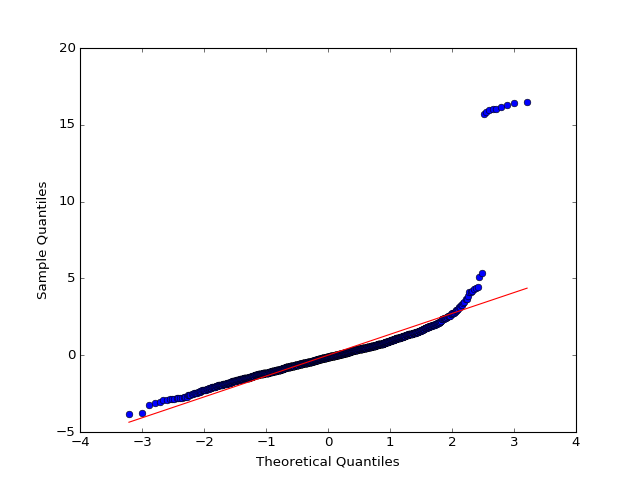

In [37]:
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(1,1,1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))    # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color='r', linewidth=4)    

def qq_plot(residuals):
    sm.qqplot(residuals)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd
    
fitted = reg1.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")


fig = sm.qqplot(residuals, dist="norm", line="r")

## Logistic Regression

In [41]:
def create_lagged_series_ttm(lags=5):
    """This creates a pandas DataFrame that stores the percentage returns of the 
    adjusted closing value of a stock obtained from Yahoo Finance, along with 
    a number of lagged returns from the prior trading days (lags defaults to 5 days).
    Trading volume, as well as the Direction from the previous day, are also included."""

    # Obtain stock information from Yahoo Finance
    ts_ttm = DataReader('TTM', "yahoo", datetime(2010,1,1), datetime(2016,1,1))
    start_date = (2010,1,1)
    # Create the new lagged DataFrame
    tslag_ttm = pd.DataFrame(index=ts_ttm.index)
    tslag_ttm["Today"] = ts_ttm["Adj Close"]
    tslag_ttm["Volume"] = ts_ttm["Volume"]

    # Create the shifted lag series of prior trading period close values
    for i in xrange(0,lags):
        tslag_ttm["Lag%s" % str(i+1)] = ts_ttm["Adj Close"].shift(i+1)

    # Create the returns DataFrame
    tsret_ttm = pd.DataFrame(index=tslag_ttm.index)
    tsret_ttm["Volume"] = tslag_ttm["Volume"]
    tsret_ttm["Today"] = tslag_ttm["Today"].pct_change()*100.0

    for i,x in enumerate(tsret_ttm["Today"]):
        if (abs(x) < 0.0001):
            tsret_ttm["Today"][i] = 0.0001

    
    for i in xrange(0,lags):
        tsret_ttm["Lag%s" % str(i+1)] = tslag_ttm["Lag%s" % str(i+1)].pct_change()*100.0

    tsret_ttm["Direction"] = np.sign(tsret_ttm["Today"])
    tsret_ttm = tsret_ttm[tsret_ttm.index >= datetime(2010,1,1)]
    tsret_ttm = tsret_ttm.fillna(0)
    
    
    tsret_ttm = tsret_ttm.reset_index()
    tsret_ttm['Date'] = tsret_ttm['Date'].dt.year
    global tsret_ttm

    return tsret_ttm.head()
    

create_lagged_series_ttm()



<ipython-input-41-9e77158c9b2a>:39: SyntaxWarning: name 'tsret_ttm' is assigned to before global declaration
  global tsret_ttm
C:\Users\aniru\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Volume,Today,Lag1,Lag2,Lag3,Lag4,Lag5,Direction
0,2010,2141700,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,2010,2022500,-0.998334,0.000000,0.000000,0.000000,0.0,0.0,-1.0
2,2010,2057800,0.784307,-0.998334,0.000000,0.000000,0.0,0.0,1.0
3,2010,2706800,-2.334629,0.784307,-0.998334,0.000000,0.0,0.0,-1.0
4,2010,1967200,-0.967558,-2.334629,0.784307,-0.998334,0.0,0.0,-1.0


In [47]:
X_ttm = tsret_ttm[tsret_ttm.columns[1:-1]]
y_ttm = pd.factorize(tsret_ttm["Direction"])[0]
clf = LogisticRegression()
clf.fit(X_ttm, y_ttm)
(clf.intercept_, clf.coef_)

(array([ -1.13917324e-11,  -3.19429673e-02,   2.66467077e-02]),
 array([[ -6.38281850e-06,  -1.24982877e-12,  -5.26127136e-13,
          -1.10218796e-12,  -3.16762250e-12,  -2.69140170e-12,
          -3.12492517e-12],
        [ -2.99875829e-08,  -1.37771845e+00,   3.11450659e-02,
           1.65536136e-02,   2.69708775e-02,  -2.55065278e-02,
           4.61450632e-03],
        [  2.41407774e-08,   1.20082008e+00,  -3.01599353e-02,
          -1.64578098e-02,  -3.45641714e-02,   3.24890424e-02,
           1.16838972e-03]]))

In [48]:
probs = clf.predict_proba(X_ttm)
len(probs)
[prob[0] for prob in probs[20:30]]

[0.00047006860872097166,
 0.00032245128750140557,
 2.0758565721018253e-07,
 4.2762968637896375e-05,
 0.0042318979134677659,
 0.0033959495352835971,
 0.0018944841303998885,
 0.010764223847717616,
 0.0012072569592082153,
 0.0075753673976417567]

In [49]:
ypreds = ["Up" if prob[0] > 0.004555 else "Down" for prob in probs]
ypreds[10:30]

['Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Up',
 'Down',
 'Up']

In [54]:
yacts = [str(x) for x in tsret["Direction"].values]
b = confusion_matrix(yacts, ypreds)
b

array([[  0,   0,   0, 631,  73],
       [  0,   0,   0,   1,   0],
       [  0,   0,   0, 720,  85],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]])

In [53]:
(b[0][3]+b[2][4])/(b[0][3]+b[2][4]+b[0][4]+b[2][4])

0.81922196796338675

## Training and testing 

In [55]:
ttm_train_df = tsret_ttm[tsret_ttm["Date"] < 2012]
ttm_test_df = tsret_ttm[tsret_ttm["Date"] >= 2012]
clf2 = LogisticRegression()
Xtrain_ttm = ttm_train_df[tsret_ttm.columns[1:-2]]
ytrain_ttm = pd.factorize(ttm_train_df["Direction"])[0]
clf2.fit(Xtrain_ttm, ytrain_ttm)
Xtest_ttm = ttm_test_df[tsret_ttm.columns[1:-2]]
ytest_ttm = pd.factorize(ttm_test_df["Direction"])[0]
ypred_ttm = clf2.predict(Xtest_ttm)
confusion_matrix(ytest_ttm, ypred_ttm)

array([[  0, 527],
       [  0, 479]])

In [56]:
accuracy_score(ytest_ttm, ypred_ttm)

0.47614314115308148

## Fitting smaler model

In [57]:
clf3 = LogisticRegression()
Xtrain_ttm = ttm_train_df[tsret_ttm.columns[1:3]]
Xtest_ttm = ttm_test_df[tsret_ttm.columns[1:3]]
clf3.fit(Xtrain_ttm, ytrain_ttm)
ypred_ttm = clf3.predict(Xtest_ttm)
confusion_matrix(ytest_ttm, ypred_ttm)

array([[  0, 527],
       [  0, 479]])

In [58]:
accuracy_score(ytest_ttm, ypred_ttm)

0.47614314115308148